In [38]:
import numpy as np
import pickle
import random
from tqdm import tqdm
rng = np.random.RandomState(112313)
# from scipy.stats import uniform
# from scipy.optimize import minimize
# from scipy.optimize import minimize_scalar
from matplotlib import rcParams, pyplot as plt
import matplotlib.ticker as mtick
from tqdm.notebook import tqdm
from math import floor, ceil, sqrt, pi
from time import time
from itertools import combinations
import pandas as pd
import seaborn as sns
# from sklearn.decomposition import PCA
from collections import Counter
from collections import defaultdict
import copy
from string import ascii_uppercase as auc
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle/')
from skimage import io
import matplotlib.pyplot as plt
#import jpegio as jio

In [6]:
# !kaggle datasets download -d zapak1010/bossbase-bows2
# !unzip bossbase-bows2.zip -d dataset_directory 


In [ ]:
import imageio
import binascii

with open(image_path, 'rb') as f:
    # Read the first few bytes (e.g., 10 bytes) of the image file
    #header_bytes = f.read(10)  # Adjust the number of bytes to read as needed
    header_bytes = f.read()
    
def read_image_hex(filepath):
   
    image_data = imageio.imread(filepath)
    

    image_bytes = image_data.tobytes()
    

    #hex_data = binascii.hexlify(image_bytes).decode('ascii')
    hex_data = binascii.hexlify(image_bytes).decode('utf-8')
        
    return hex_data


hex_data = read_image_hex('cover image 3.png')
print("HEX_DATA: ", hex_data)

hex_header = ' '.join(f'{byte:02X}' for byte in header_bytes)

# Display the formatted hexadecimal header
print("HEX_HEADER: ",hex_header)

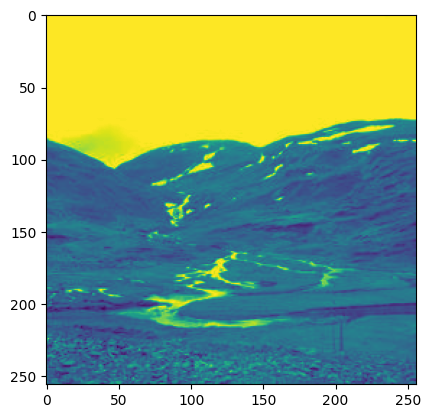

In [20]:
# image = io.imread('dataset_directory/GBRASNET/BOSSbase-1.01/cover/1.pgm')
image = io.imread('dataset1\\boss_256_0.4_train\\stego\\1.png')
plt.imshow(image)
plt.show()

Histogram Analysis

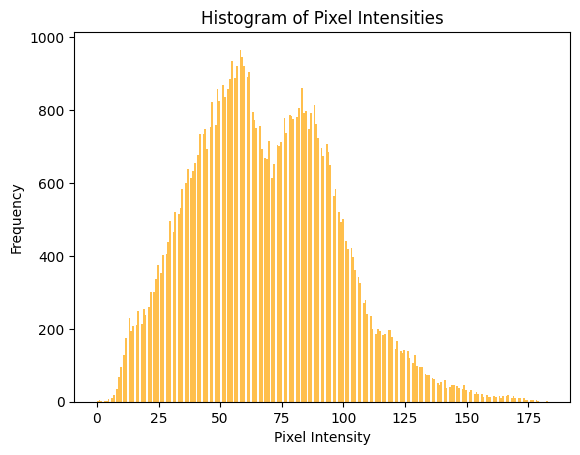

In [8]:
plt.hist(image.ravel(), bins=256, color='orange', alpha=0.7)
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [9]:
#jpeg = jio.read(image)
#quant =  jpeg.quant_tables


#quant_tables = jpeg.quant_tables
#print("Quantization Tables:", quant_tables)



PVD

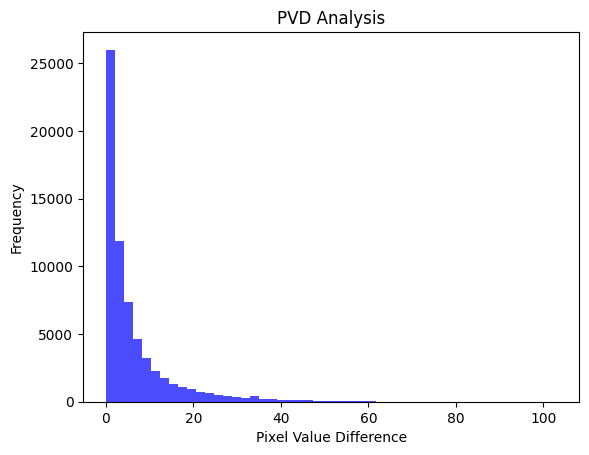

In [10]:
def analyze_pvd(image):
    # Example function structure
    differences = []
    for i in range(image.shape[0] - 1):
        for j in range(image.shape[1] - 1):
            diff = abs(int(image[i, j]) - int(image[i, j+1]))
            differences.append(diff)
    return differences

pvd_results = analyze_pvd(image)
plt.hist(pvd_results, bins=50, color='blue', alpha=0.7)
plt.title('PVD Analysis')
plt.xlabel('Pixel Value Difference')
plt.ylabel('Frequency')
plt.show()


Entropy

In [11]:

def calculate_entropy(image):
    histogram, _ = np.histogram(image, bins=256, range=(0, 256))
    histogram_normalized = histogram / histogram.sum()
    entropy = -np.sum(histogram_normalized * np.log2(histogram_normalized + 1e-9))  # add a small epsilon to avoid log(0)
    return entropy

image_entropy = calculate_entropy(image)
print(f"Entropy of the image: {image_entropy}")


Entropy of the image: 6.853761696551199


In [13]:
from imageio.v2 import imread
def load_image(image_path):
    
    # return imread(image_path, as_gray=True).astype(int)
    return imread(image_path, mode='L').astype(int)

# image_path = 'dataset_directory/GBRASNET/BOSSbase-1.01/stego/HUGO/0.2bpp/stego/1.pgm'
# image_path = 'dataset_directory/GBRASNET/BOSSbase-1.01/stego/HILL/0.2bpp/stego/1.pgm'
#image_path = 'C:\\Users\\xxxx\\Downloads\\steganalysis\\dataset1\\boss_256_0.4_test\\stego\\9001.png'
image_path = 'C:\\Users\\xxxx\\Downloads\\steganalysis\\Stego-pvd-dataset\\test\\stegoTest\\05999x.png'
image = load_image(image_path)

In [14]:
def compute_pdh(image):

    diffs = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1] - 1):
            diff = image[i, j] - image[i, j+1]
            diffs.append(diff)
            diffs.append(-diff)
    
    for i in range(image.shape[0] - 1):
        for j in range(image.shape[1]):
            diff = image[i, j] - image[i + 1, j]
            diffs.append(diff)
            diffs.append(-diff)
    
    diffs = np.array(diffs)
    hist, bin_edges = np.histogram(diffs, bins=50)

    # return np.array(diffs)
    return hist, bin_edges

compute_pdh(image)

(array([      6,      23,      30,      35,      28,      41,     367,
             23,      53,      50,     104,      80,      76,     152,
            135,     261,     222,     278,     282,     363,     781,
            589,     720,    1863,   22021, 1011383,    1863,     720,
            589,     684,     460,     282,     278,     222,     240,
            156,     152,      76,      80,      99,      55,      53,
             23,     367,      38,      31,      35,      30,      23,
              6], dtype=int64),
 array([-215. , -206.4, -197.8, -189.2, -180.6, -172. , -163.4, -154.8,
        -146.2, -137.6, -129. , -120.4, -111.8, -103.2,  -94.6,  -86. ,
         -77.4,  -68.8,  -60.2,  -51.6,  -43. ,  -34.4,  -25.8,  -17.2,
          -8.6,    0. ,    8.6,   17.2,   25.8,   34.4,   43. ,   51.6,
          60.2,   68.8,   77.4,   86. ,   94.6,  103.2,  111.8,  120.4,
         129. ,  137.6,  146.2,  154.8,  163.4,  172. ,  180.6,  189.2,
         197.8,  206.4,  215. ]))

In [15]:
def plot_pdh(hist, bin_edges):
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')
    # plt.title('Pairwise Difference Histogram (PDH)')
    plt.xlabel('Pixel Value Difference')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


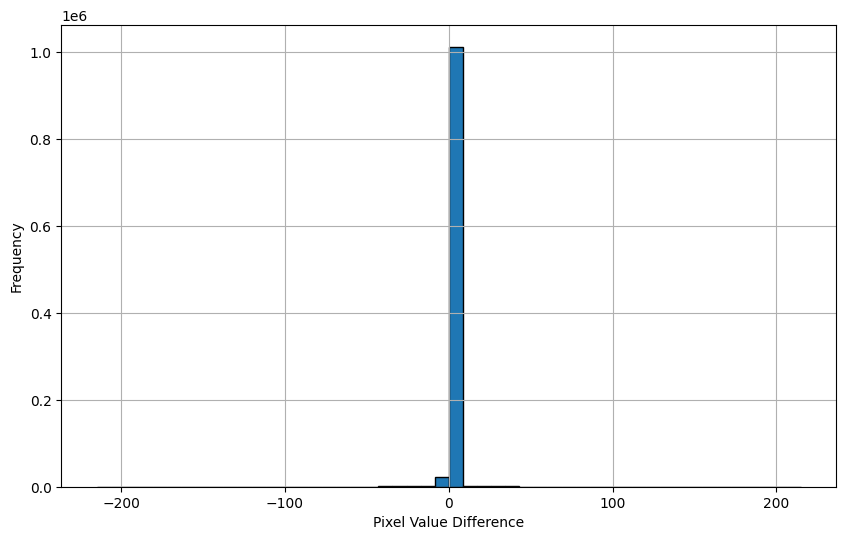

In [16]:
def analyze_image(image_path):
    image = load_image(image_path) 
    hist, bin_edges = compute_pdh(image)
    plot_pdh(hist, bin_edges)


analyze_image('C:\\Users\\xxxx\\Downloads\\steganalysis\\Stego-pvd-dataset\\test\\stegoTest\\05999x.png')
# analyze_image('5LiotkiT.jpg_small')
# analyze_image('5LiotkiT.jpg_small')

In [31]:
def load_image(image_path):
    return imread(image_path, mode='L').astype(int)

def compute_pdh(image):
    diffs = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1] - 1):
            diff = image[i, j] - image[i, j+1]
            diffs.extend([diff, -diff])

    for i in range(image.shape[0] - 1):
        for j in range(image.shape[1]):
            diff = image[i, j] - image[i + 1, j]
            diffs.extend([diff, -diff])

    return np.array(diffs)

def calculate_f_statistic(diffs):
    if diffs.size == 0:
        return None

    hist_range = (np.min(diffs), np.max(diffs) + 1)
    hist, bin_edges = np.histogram(diffs, bins=50, range=hist_range)

    obs_freq = hist
    exp_freq = (hist + hist[::-1]) / 2

    epsilon = 1e-10
    f_value = np.sum((obs_freq - exp_freq) ** 2 / (exp_freq + epsilon))
    return f_value

def analyze_images(cover_path, stego_path):
    cover_image = load_image(cover_path)
    stego_image = load_image(stego_path)

    cover_diffs = compute_pdh(cover_image)
    stego_diffs = compute_pdh(stego_image)

    cover_f_value = calculate_f_statistic(cover_diffs)
    stego_f_value = calculate_f_statistic(stego_diffs)

    print(f"Cover F Value: {cover_f_value}")
    print(f"Stego F Value: {stego_f_value}")

    if cover_f_value is not None and stego_f_value is not None:
        if cover_f_value > stego_f_value:
            print("Analysis Correct: Cover is greater than Stego.")
        else:
            print("Analysis Incorrect: Stego is greater than or equal to Cover.")

cover_image_path = 'dataset1\\boss_256_0.4_test\\cover\\9010.png'
stego_image_path = 'dataset1\\boss_256_0.4_test\\bossbase_test\\9010.png'
analyze_images(cover_image_path, stego_image_path)

Cover F Value: 9273.70857732894
Stego F Value: 9029.210187049628
Analysis Correct: Cover is greater than Stego.


In [29]:
import requests
import time

def upload_and_check_image(api_key, file_path):
    url = "https://www.virustotal.com/api/v3/files"
    
    with open(file_path, 'rb') as file:
        files = {'file': (file_path, file)}
        headers = {'x-apikey': api_key}
        response = requests.post(url, headers=headers, files=files)
        response_data = response.json()
        
        if response.status_code == 200:
            analysis_id = response_data['data']['id']
            print("File uploaded successfully. Analysis ID:", analysis_id)
            
            analysis_url = f"https://www.virustotal.com/api/v3/analyses/{analysis_id}"
            max_retries = 10  
            
            for _ in range(max_retries):
                result_response = requests.get(analysis_url, headers=headers)
                result_data = result_response.json()
                
                if 'data' in result_data and 'attributes' in result_data['data']:
                    status = result_data['data']['attributes']['status']
                    print("Current analysis status:", status)
                    
                    if status == 'completed':
                        malicious = result_data['data']['attributes']['stats']['malicious']
                        if malicious > 0:
                            print("WARNING: The file is infected.")
                        else:
                            print("The file is clean.")
                        break
                else:
                    if 'error' in result_data:
                        print("Error during analysis:", result_data['error'])
                        break
                    print("Waiting for analysis result...")
                    time.sleep(15)  
            else:
                print("Analysis did not complete in the expected time.")
        else:
            print("Failed to upload file:", response_data.get('error', {}).get('message', 'No error message available'))

api_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
file_path = 'cover_image_3.jpg'
upload_and_check_image(api_key, file_path)


File uploaded successfully. Analysis ID: YTVmNzAxYmY2YWU3ZWJmMTM5MWI2MWZjZDUzMzRlNmU6MTcxNTU5NDMyNg==
Current analysis status: queued
Current analysis status: queued
Current analysis status: queued
Current analysis status: queued
Current analysis status: queued
Current analysis status: queued
Current analysis status: queued
Current analysis status: queued
Current analysis status: queued
Current analysis status: queued
Analysis did not complete in the expected time.


In [32]:
from imageio.v2 import imread
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    return imread(image_path, mode='L').astype(int)

def compute_pdh(image):
    diffs = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1] - 1):
            diff = image[i, j] - image[i, j+1]
            diffs.extend([diff, -diff])

    for i in range(image.shape[0] - 1):
        for j in range(image.shape[1]):
            diff = image[i, j] - image[i + 1, j]
            diffs.extend([diff, -diff])

    return np.array(diffs)

def calculate_f_statistic(diffs):
    if diffs.size == 0:
        return None

    hist_range = (np.min(diffs), np.max(diffs) + 1)
    hist, bin_edges = np.histogram(diffs, bins=50, range=hist_range)

    obs_freq = hist
    exp_freq = (hist + hist[::-1]) / 2

    epsilon = 1e-10
    f_value = np.sum((obs_freq - exp_freq) ** 2 / (exp_freq + epsilon))
    return f_value

def analyze_images(cover_path, stego_path):
    cover_image = load_image(cover_path)
    stego_image = load_image(stego_path)

    cover_diffs = compute_pdh(cover_image)
    stego_diffs = compute_pdh(stego_image)

    cover_f_value = calculate_f_statistic(cover_diffs)
    stego_f_value = calculate_f_statistic(stego_diffs)

    print(f"Cover F Value: {cover_f_value}")
    print(f"Stego F Value: {stego_f_value}")

    results = {
        'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0
    }

    if cover_f_value > stego_f_value:
        results['TN'] += 1  # True Negative: Cover correctly identified with higher F value
        results['TP'] += 1  # True Positive: Stego correctly identified with lower F value
    else:
        results['FN'] += 1  # False Negative: Cover misidentified (lower F value)
        results['FP'] += 1  # False Positive: Stego misidentified (higher F value)

    print("Results:", results)

# Example usage:
cover_image_path = 'C:\\Users\\xxxx\\Downloads\\steganalysis\\Stego-pvd-dataset\\test\\cleanTest\\06000.png'
stego_image_path = 'C:\\Users\\xxx\\Downloads\\steganalysis\\Stego-pvd-dataset\\test\\stegoTest\\06000x.png'
analyze_images(cover_image_path, stego_image_path)


Cover F Value: 1030232.8212818888
Stego F Value: 1027563.9744542408
Results: {'TP': 1, 'TN': 1, 'FP': 0, 'FN': 0}


In [ ]:
from imageio.v2 import imread
import numpy as np
import os

def load_image(image_path):
    try:
        return imread(image_path, mode='L').astype(int)
    except FileNotFoundError:
        print(f"File not found: {image_path}")
        return None

def compute_pdh(image):
    diffs = []
    if image is not None:
        for i in range(image.shape[0]):
            for j in range(image.shape[1] - 1):
                diff = image[i, j] - image[i, j+1]
                diffs.extend([diff, -diff])

        for i in range(image.shape[0] - 1):
            for j in range(image.shape[1]):
                diff = image[i, j] - image[i + 1, j]
                diffs.extend([diff, -diff])

    return np.array(diffs)

def calculate_f_statistic(diffs):
    if diffs.size == 0:
        return None

    hist_range = (np.min(diffs), np.max(diffs) + 1)
    hist, bin_edges = np.histogram(diffs, bins=50, range=hist_range)
    obs_freq = hist
    exp_freq = (hist + hist[::-1]) / 2

    epsilon = 1e-10
    f_value = np.sum((obs_freq - exp_freq) ** 2 / (exp_freq + epsilon))
    return f_value

def analyze_images(base_path, cover_dir, stego_dir, num_images):
    results = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    errors = {'FP': [], 'FN': [], 'Missing Files': []}

    for i in tqdm(range(1, num_images + 1)):
        cover_path = os.path.join(base_path, cover_dir, f"{i}.pgm")
        stego_path = os.path.join(base_path, stego_dir, f"{i}.pgm")

        cover_image = load_image(cover_path)
        stego_image = load_image(stego_path)

        if cover_image is None or stego_image is None:
            errors['Missing Files'].extend([cover_path, stego_path])
            continue  # Skip this pair if either image is missing

        cover_diffs = compute_pdh(cover_image)
        stego_diffs = compute_pdh(stego_image)

        cover_f_value = calculate_f_statistic(cover_diffs)
        stego_f_value = calculate_f_statistic(stego_diffs)

        if cover_f_value > stego_f_value:
            results['TN'] += 1
            results['TP'] += 1
        else:
            results['FN'] += 1
            results['FP'] += 1
            errors['FP'].append(stego_path)
            errors['FN'].append(cover_path)

    return results, errors

def compute_metrics(results):
    TP, TN, FP, FN = results['TP'], results['TN'], results['FP'], results['FN']
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    Accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    
    return {
        'FPR': FPR,
        'TPR': TPR,
        'Precision': Precision,
        'Recall': Recall,
        'Accuracy': Accuracy
    }


base_path = 'dataset_directory/GBRASNET/BOSSbase-1.01'
cover_dir = 'cover'
stego_dir = 'stego/HILL/0.2bpp/stego'
num_images = 1000

results, errors = analyze_images(base_path, cover_dir, stego_dir, num_images)
metrics = compute_metrics(results)
print("Metrics:", metrics)
print("Missing Files:", errors['Missing Files'])


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
epsilon = 1e-10

def chi_squared_distance(hist1, hist2):
    # Compute the Chi-Squared distance
    chi_squared = np.sum((hist1 - hist2)**2 / hist2 + epsilon)
    return chi_squared

# Load and preprocess two images
image1 = cv2.imread('Stego-pvd-dataset\\train\\cleanTrain\\00001.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('Stego-pvd-dataset\\train\\stegoTrain\\00001x.png', cv2.IMREAD_GRAYSCALE)

# Calculate histograms of pixel intensities for both images
hist1, _ = np.histogram(image1.ravel(), bins=256, range=(0, 255))
hist2, _ = np.histogram(image2.ravel(), bins=256, range=(0, 255))



# Chi-Squared distance between the histograms
chi_squared = chi_squared_distance(hist1, hist2)

# the histograms 
plt.figure(figsize=(12, 6))

# histogram of image 1
plt.subplot(1, 3, 1)
plt.title('Histogram of Image 1')
plt.plot(hist1)

# histogram of image 2
plt.subplot(1, 3, 2)
plt.title('Histogram of Image 2')
plt.plot(hist2)


plt.tight_layout()
plt.show()

print("HIST1",hist1)
print("HIST2",hist2)
print("CHI_SQUARED",chi_squared)


In [ ]:
def calculate_f_statistic(diffs):


    if diffs.size == 0:
        return None

    hist_range = (np.min(diffs), np.max(diffs) + 1)
    hist, bin_edges = np.histogram(diffs, bins=50, range=hist_range)

    obs_freq = hist
    exp_freq = (hist + hist[::-1]) / 2

    epsilon = 1e-10
    
    f_value = np.sum((obs_freq - exp_freq) ** 2 / (exp_freq + epsilon))
    return f_value

